# Group 3 - Project 1
## Flights Delays and Cancellation

## Data

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.
https://www.kaggle.com/usdot/flight-delays/home
In "flights.csv"
Rows: 5819079
Columns: 31

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

## Check files existence

In [2]:

import os
print(os.listdir("."))

['flights.csv', 'test.txt', 'airlines.csv', 'old', '620Group3_Project1_ver2.ipynb', '620Group3_Project1_ver2.pdf', 'airports.csv', '.ipynb_checkpoints']


## Read flights to networkx

### either by raw csv or from Saved Pajek file

In [3]:
import networkx as nx
import matplotlib.pyplot as plt



g=nx.DiGraph()


In [4]:
def is_number(n):
    is_number = True
    try:
        num = float(n)
        # check for "nan" floats
        is_number = num == num   # or use `math.isnan(num)`
    except ValueError:
        is_number = False
    return is_number

In [5]:

#read and add to graph if pajet network data doesn't exist

if not os.path.isfile(r'flights_edges.txt'):
    print("read from flights.csv")
    myfile = open("flights.csv", encoding='utf-8' )


    line = myfile.readline() 

    while line:
        line = myfile.readline()
        v = line.split(',')

        if( len(v) == 31 ):
            if( len(v[7]) == 3 and len(v[8]) == 3 and is_number(v[11]) ): #skip airport code is not xxx
                length_value = int(v[11])
                g.add_weighted_edges_from([(v[7], v[8], length_value)])
                

    myfile.close()
    print (nx.info(g))
    #Saving network data
    nx.write_pajek(g,r'flights_edges.txt')

else:
    print("read from flight_edges.txt")
    g = nx.read_pajek(r'flights_edges.txt')
    print (nx.info(g))

read from flights.csv
Name: 
Type: DiGraph
Number of nodes: 322
Number of edges: 4691
Average in degree:  14.5683
Average out degree:  14.5683


In [8]:
### Check edge weights

In [9]:
for n, nbrs in g.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        print('(%s, %s, %.3f)' % (n, nbr, wt))

(ANC, SEA, -8.000)
(ANC, PDX, -5.000)
(ANC, PHX, 4.000)
(ANC, MSP, 0.000)
(ANC, OTZ, 2.000)
(ANC, SCC, 13.000)
(ANC, JNU, -2.000)
(ANC, OGG, 0.000)
(ANC, OME, 0.000)
(ANC, BET, 16.000)
(ANC, HNL, -9.000)
(ANC, ADK, -9.000)
(ANC, SFO, 28.000)
(ANC, ORD, -13.000)
(ANC, LAS, -8.000)
(ANC, FAI, -5.000)
(ANC, LAX, -5.000)
(ANC, DEN, -10.000)
(ANC, KOA, -7.000)
(ANC, ADQ, -8.000)
(ANC, CDV, 5.000)
(ANC, BRW, 14.000)
(ANC, IAH, 22.000)
(ANC, LGB, 0.000)
(ANC, ATL, -2.000)
(ANC, SLC, -6.000)
(ANC, DFW, 0.000)
(ANC, DLG, -15.000)
(ANC, AKN, 22.000)
(ANC, EWR, 36.000)
(SEA, ANC, 0.000)
(SEA, MSP, 16.000)
(SEA, MIA, -3.000)
(SEA, PHX, 0.000)
(SEA, DEN, 9.000)
(SEA, IAH, 2.000)
(SEA, DFW, 2.000)
(SEA, EWR, 12.000)
(SEA, SJC, -3.000)
(SEA, OAK, 15.000)
(SEA, SFO, 0.000)
(SEA, LAS, -5.000)
(SEA, IAD, 0.000)
(SEA, LAX, -5.000)
(SEA, SNA, -2.000)
(SEA, ORD, 1.000)
(SEA, MDW, 9.000)
(SEA, ATL, -4.000)
(SEA, PHL, -3.000)
(SEA, SAN, -7.000)
(SEA, SLC, -7.000)
(SEA, PSP, 2.000)
(SEA, SMF, -1.000)
(SEA, DT

(ONT, MDW, -1.000)
(ONT, DFW, -1.000)
(ONT, OAK, -3.000)
(ONT, SLC, 10.000)
(ONT, SJC, -4.000)
(ONT, LAS, 8.000)
(ONT, IAH, 0.000)
(ONT, SMF, 47.000)
(ONT, ATL, -5.000)
(KOA, HNL, -8.000)
(KOA, OGG, -3.000)
(KOA, PDX, -13.000)
(KOA, LAX, 9.000)
(KOA, SEA, -3.000)
(KOA, SFO, -7.000)
(KOA, SJC, 20.000)
(KOA, DEN, -10.000)
(KOA, PHX, -6.000)
(KOA, OAK, 2.000)
(KOA, ANC, -11.000)
(KOA, SAN, -2.000)
(OGG, HNL, -16.000)
(OGG, ITO, 2.000)
(OGG, SMF, -9.000)
(OGG, PDX, -11.000)
(OGG, OAK, -9.000)
(OGG, KOA, 4.000)
(OGG, LIH, 3.000)
(OGG, SJC, -7.000)
(OGG, SEA, -19.000)
(OGG, LAX, -2.000)
(OGG, SFO, -2.000)
(OGG, PHX, 190.000)
(OGG, BLI, -8.000)
(OGG, SAN, -8.000)
(OGG, ORD, 79.000)
(OGG, DFW, 22.000)
(OGG, DEN, -7.000)
(OGG, ANC, 24.000)
(MYR, FLL, 3.000)
(MYR, LGA, -6.000)
(MYR, ATL, -1.000)
(MYR, ACY, -12.000)
(MYR, BOS, -10.000)
(MYR, LBE, 2.000)
(MYR, ORD, -12.000)
(MYR, DTW, -6.000)
(MYR, IAG, -9.000)
(MYR, BWI, 1.000)
(MYR, CLT, -6.000)
(MYR, PHL, -9.000)
(MYR, CRW, 10.000)
(MYR, PBG, -

(CMH, IAD, 3.000)
(CMH, DTW, 4.000)
(CMH, CLT, 15.000)
(CMH, DCA, 70.000)
(CMH, DAL, -5.000)
(CMH, OAK, -2.000)
(CMH, BOS, 1.000)
(PSC, DEN, 18.000)
(PSC, SFO, -11.000)
(PSC, SLC, -4.000)
(PSC, MSP, 1.000)
(PSC, SEA, -1.000)
(CPR, DEN, -5.000)
(CPR, SLC, -13.000)
(ACV, SFO, -4.000)
(DAL, IAH, 1.000)
(DAL, MDW, 80.000)
(DAL, BWI, 34.000)
(DAL, LGA, 52.000)
(DAL, ATL, -8.000)
(DAL, FLL, 3.000)
(DAL, LAS, 29.000)
(DAL, PHX, 19.000)
(DAL, TUL, -1.000)
(DAL, DCA, 45.000)
(DAL, STL, 0.000)
(DAL, DEN, 8.000)
(DAL, MCO, 22.000)
(DAL, HOU, 68.000)
(DAL, TPA, 25.000)
(DAL, ELP, 48.000)
(DAL, LAX, 60.000)
(DAL, OKC, -5.000)
(DAL, BNA, -2.000)
(DAL, MSY, -2.000)
(DAL, ABQ, 21.000)
(DAL, SAN, 6.000)
(DAL, SNA, 18.000)
(DAL, MCI, -1.000)
(DAL, AUS, 13.000)
(DAL, MAF, 20.000)
(DAL, SAT, 22.000)
(DAL, LBB, 141.000)
(DAL, AMA, 75.000)
(DAL, SFO, 48.000)
(DAL, LIT, 14.000)
(DAL, BHM, 29.000)
(DAL, ICT, 2.000)
(DAL, OAK, 14.000)
(DAL, ECP, 7.000)
(DAL, MKE, 30.000)
(DAL, SEA, 3.000)
(DAL, PDX, 6.000)
(DA

## Compute network data

### Degrees = the most connected airports

In [10]:
deg = nx.degree(g)


check deg data type

In [11]:
type(deg)


networkx.classes.reportviews.DiDegreeView

DiDegreeView return two-tuple (node, degree) according to networkX documentation

Sort DiDegreeView to find min and max degree

In [12]:
def sorted_map(map):
    ms = sorted(map, key=lambda x: (-x[1],x[0]))
    return ms

sorted_deg = sorted_map(deg)

In [13]:
for node, degree in sorted_deg:
    print (node, degree)

ATL 338
ORD 324
DFW 297
DEN 279
MSP 240
IAH 238
DTW 224
SLC 179
EWR 174
LAX 161
SFO 161
PHX 157
LAS 156
MCO 148
SEA 146
LGA 139
CLT 138
IAD 138
MDW 138
BWI 134
JFK 129
BOS 124
TPA 122
FLL 120
DCA 116
MIA 109
DAL 104
HOU 102
STL 97
PDX 95
BNA 93
PHL 93
SAN 93
AUS 84
CVG 81
MCI 81
RSW 79
MSY 75
CLE 72
RDU 71
OAK 69
ANC 60
IND 60
PIT 60
SAT 60
MKE 58
CMH 57
HNL 56
SMF 54
BDL 50
PBI 50
SJC 50
ABQ 46
CHS 46
MEM 46
SJU 46
JAX 44
OKC 44
SNA 44
OMA 40
TTN 37
BUF 36
OGG 36
SDF 36
TUL 35
MSN 34
MYR 34
RIC 34
ORF 33
BOI 32
TUS 32
BHM 31
GRR 31
PVD 30
ALB 29
ONT 28
GSP 27
DSM 26
JAC 26
RNO 26
ROC 26
BZN 24
CAK 24
DAY 24
ELP 24
KOA 24
LGB 24
LIT 24
PSP 24
STT 24
MHT 23
BUR 22
GSO 22
LIH 22
PWM 22
SYR 22
XNA 22
EGE 21
SAV 21
ACY 20
GEG 20
HDN 20
ICT 20
MTJ 20
TYS 20
COS 19
FAT 18
HPN 18
PNS 18
ASE 17
LEX 17
FNT 16
HSV 16
PIA 16
RAP 16
LBB 15
MSO 15
BMI 14
BTV 14
CID 14
ECP 14
JNU 14
LBE 14
SRQ 14
CAE 13
CRW 13
FAR 13
GJT 13
SBN 13
FSD 12
ISP 12
MAF 12
MDT 12
MLI 12
SBA 12
TVC 12
AMA 11
BIL 11
FCA 11

Top 10 Nodes by Degree

In [14]:
sorted_deg[0:10]

[('ATL', 338),
 ('ORD', 324),
 ('DFW', 297),
 ('DEN', 279),
 ('MSP', 240),
 ('IAH', 238),
 ('DTW', 224),
 ('SLC', 179),
 ('EWR', 174),
 ('LAX', 161)]

Bottem 10 Nodes with Degree

In [15]:
sorted_deg[-10:]

[('STC', 2),
 ('SUX', 2),
 ('TOL', 2),
 ('TRI', 2),
 ('TWF', 2),
 ('TXK', 2),
 ('VEL', 2),
 ('VLD', 2),
 ('WYS', 2),
 ('YUM', 2)]

### Trim Degree function

In [16]:
def trim_degree(g,degree=1):
    g2 = g.copy()
    d = nx.degree(g2)
    for n in g.nodes():
        if d[n] <= degree: g2.remove_node(n)
    return g2


get top nodes


In [17]:
topnodes =trim_degree(g,161)

Check # of nodes and print nodes

In [18]:
len(topnodes)

8

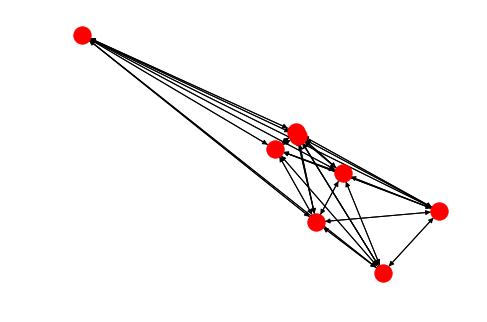

In [19]:
nx.draw(topnodes)

## Calculate Centrality

### Closeness Centrality

In [20]:
c = nx.closeness_centrality(topnodes)

In [21]:
type(c)

dict

In [22]:
print(c)

{'MSP': 1.0, 'DFW': 1.0, 'ATL': 1.0, 'DEN': 1.0, 'SLC': 1.0, 'IAH': 1.0, 'ORD': 1.0, 'DTW': 1.0}


### eigenvector_centrality

In [23]:
ec = nx.eigenvector_centrality(topnodes)


In [24]:
type(ec)

dict

In [25]:
print(ec)

{'MSP': 0.3535533905932738, 'DFW': 0.3535533905932738, 'ATL': 0.3535533905932738, 'DEN': 0.3535533905932738, 'SLC': 0.3535533905932738, 'IAH': 0.3535533905932738, 'ORD': 0.3535533905932738, 'DTW': 0.3535533905932738}
